# KoNLPY  중 MeCab 클래스 실습환경


In [1]:
from konlpy.tag import Mecab

mecab = Mecab()
print(mecab.morphs('자연어처리가너무재밌어서밥먹는것도가끔까먹어요'))

['자연어', '처리', '가', '너무', '재밌', '어서', '밥', '먹', '는', '것', '도', '가끔', '까먹', '어요']


# 15-2.  데이터 다운로드 및 전처리

In [2]:
import os

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

%matplotlib inline

In [3]:
import os
path_to_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko'

with open(path_to_file, "r") as f:
    raw = f.read().splitlines()

print("Data Size:", len(raw))

print("Example:")
for sen in raw[0:100][::20]: print(">>", sen)

Data Size: 94123
Example:
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 60


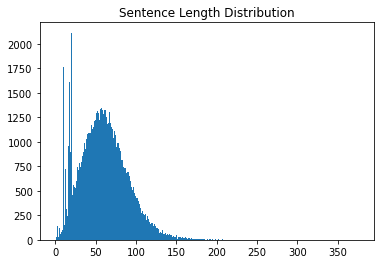

In [4]:
min_len = 999
max_len = 0
sum_len = 0

for sen in raw:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(raw))

sentence_length = np.zeros((max_len), dtype=int)

for sen in raw:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [5]:
def check_sentence_with_length(raw, length):
    count = 0
    
    for sen in raw:
        if len(sen) == length:
            print(sen)
            count += 1
            if count > 100: return

check_sentence_with_length(raw, 1)

’


In [6]:
for idx, _sum in enumerate(sentence_length):
    # 문장의 수가 1500을 초과하는 문장 길이를 추출합니다.
    if _sum > 1500:
        print("Outlier Index:", idx+1)

Outlier Index: 11
Outlier Index: 19
Outlier Index: 21


In [7]:
check_sentence_with_length(raw, 11)

라고 조던이 말했다.
- 모르고 있습니다.
- 네, 보이는군요.
디즈니사만이 아니다.
큰 파티는 아니지요.
의자는 비어 있었다.
이 일은 계속됩니다.
나는 크게 실망했다.
그 이유는 간단하다.
이력서와 자기 소개서
시대가 변하고 있다.
는 돌발질문을 했다.
9. 몇 분간의 명상
하와이, 빅 아일랜드
키스를 잘 하는 방법
키스를 잘 하는 방법
스피어스가 뚱뚱한가?
산 위를 나는 느낌.
세 시간쯤 걸었을까?
(아직 읽고있습니까?
처음에는 장난이었다.
우리는 운이 좋았다.
아기가 숨을 멈출 때
건물 전체 무너져내려
그녀의 아름다운 눈.
대답은 다음과 같다.
"사과할 것이 없다.
폭탄테러가 공포 유발
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1

Data Size: 77591
문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 64


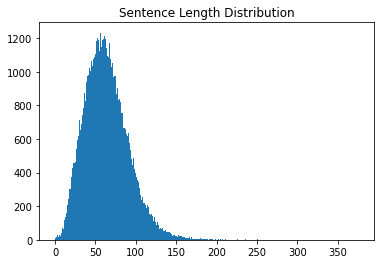

In [8]:
min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(raw))  # set를 사용해서 중복을 제거합니다.
print("Data Size:", len(cleaned_corpus))

for sen in cleaned_corpus:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype=int)

for sen in cleaned_corpus:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

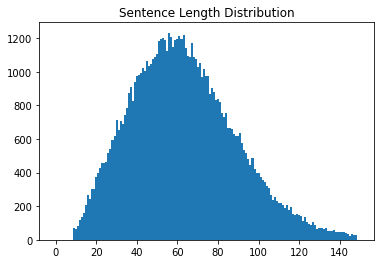

In [9]:
max_len = 150
min_len = 10

# 길이 조건에 맞는 문장만 선택합니다.
filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

# 분포도를 다시 그려봅니다.
sentence_length = np.zeros((max_len), dtype=int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

# 15-3. 공백기반 토큰화

In [10]:
def tokenize(corpus):                # corpus: Tokenized Sentence's List 
    
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer

In [11]:
# 문제 3-1
# 정제된 데이터 filtered_corpus를 공백 기반으로 토큰화하여 저장하는 코드를 직접 작성해 보세요.
split_corpus = []

for kor in filtered_corpus:
     # 코드를 작성하세요
     split_corpus.append(kor.split())




In [12]:
split_tensor, split_tokenizer = tokenize(split_corpus)

print("Split Vocab Size:", len(split_tokenizer.index_word))

Split Vocab Size: 237435


In [13]:
for idx, word in enumerate(split_tokenizer.word_index):
    print(idx, ":", word)

    if idx > 10: break

0 : 이
1 : 밝혔다.
2 : 있다.
3 : 말했다.
4 : 수
5 : 있는
6 : 그는
7 : 대한
8 : 위해
9 : 전했다.
10 : 지난
11 : 이번


# 15-4 형태소 기반 토큰화

In [14]:
# 문제 4-1
# 위에서 사용한 코드를 활용해 MeCab 단어 사전을 만들어보세요. 
# Hint : mecab.morphs()를 사용해서 형태소분석을 합니다.

def mecab_split(sentence):
    # 코드를 작성하세요
    return mecab.morphs(sentence)

mecab_corpus = []

for kor in filtered_corpus:
    # 코드를 작성하세요
    mecab_corpus.append(mecab_split(kor))
    
    


In [15]:
mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)

print("MeCab Vocab Size:", len(mecab_tokenizer.index_word))


MeCab Vocab Size: 52279


In [16]:
# 문제 4-2
# Case 1 : tokenizer.sequences_to_texts()
# 여기에 코드를 작성하세요.


print(mecab_tokenizer.sequences_to_texts([mecab_tensor[100]]))




['목격자 의 진술 에 따라 경찰 은 열 명 의 청년 이 세 명 의 북한 사람 을 공격 하 여 그 중 한 명 이 칼 에 찔려 사망 한 것 으로 보 고 있 다 .']


In [17]:
# 문제 4-3
# Case 2 : tokenizer.index_word
# 여기에 코드를 작성하세요.


sentence = ""

for w in mecab_tensor[100]:
    if w == 0: continue         
    sentence += mecab_tokenizer.index_word[w] + " "

print(sentence)


# =====
# mecab_tensor[100]: Mecab 토크나이저로 전처리된 101번째 문장의 Tensor 형태
# w == 0: padding 처리된 부분은 무시
# mecab_tokenizer.index_word[w]: ID를 실제 단어로 변환
# " ": 단어들 사이에 공백 삽입
#sentence: 최종적으로 복원된 원문(또는 형태소 시퀀스)

목격자 의 진술 에 따라 경찰 은 열 명 의 청년 이 세 명 의 북한 사람 을 공격 하 여 그 중 한 명 이 칼 에 찔려 사망 한 것 으로 보 고 있 다 . 


# 프로젝트 루브릭 

### 1. SentencePiece를 이용하여 모델을 만들기까지의 과정이 정상적으로 진행되었는가?
- 말뭉치 분석, 전처리, SentencePiece 적용, 토크나이저 구현 및 동작이 빠짐없이 이루어졌는가?

In [24]:
# 1. 말뭉치 저장
# filtered_corpus를 한 줄씩 저장

with open("corpus.txt", "w", encoding="utf-8") as f:
    for line in filtered_corpus:
        f.write(line.strip() + "\n")


In [25]:
# 2. SentencePiece 모델 학습

import sentencepiece as spm

# 학습 실행
spm.SentencePieceTrainer.train(
    input='corpus.txt',
    model_prefix='spm',
    vocab_size=8000,
    model_type='unigram',         # 또는 'bpe'
    character_coverage=1.0,       # 한글은 1.0 권장
    pad_id=0,
    unk_id=1,
    bos_id=2,
    eos_id=3
)


sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: corpus.txt
  input_format: 
  model_prefix: spm
  model_type: UNIGRAM
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 1
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 1
  bos_id: 2
  eos_id: 3
  pad_id: 0
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  escape_whitespaces: 1

In [26]:
# 3: 학습된 모델 로드 및 테스트

import sentencepiece as spm

sp = spm.SentencePieceProcessor()
sp.load("spm.model")

sample = "나는 자연어처리를 공부합니다."
print("✅ 입력 문장:", sample)
print("🧱 서브워드:", sp.encode(sample, out_type=str))
print("🔢 토큰 ID:", sp.encode(sample, out_type=int))
print("📝 복원된 문장:", sp.decode(sp.encode(sample, out_type=int)))



✅ 입력 문장: 나는 자연어처리를 공부합니다.
🧱 서브워드: ['▁나는', '▁자연', '어', '처', '리', '를', '▁공', '부', '합니다', '.']
🔢 토큰 ID: [2027, 2699, 69, 767, 41, 10, 273, 106, 1332, 5]
📝 복원된 문장: 나는 자연어처리를 공부합니다.


In [28]:
# 4: 전체 코퍼스 토큰화 → 텐서로 변환

from tensorflow.keras.preprocessing.sequence import pad_sequences

token_ids = [sp.encode(line, out_type=int) for line in filtered_corpus]
padded_ids = pad_sequences(token_ids, padding='post')

print("🧾 Tensor shape:", padded_ids.shape)


🧾 Tensor shape: (76908, 100)


### 2. SentencePiece를 통해 만든 Tokenizer가 자연어처리 모델과 결합하여 동작하는가?
- SentencePiece 토크나이저가 적용된 Text Classifier 모델이 정상적으로 수렴하여 80% 이상의 test accuracy가 확인되었다.


### 웹에서 실제 데이터셋 사용: 네이버 영화 리뷰 감정 분석 (Naver Sentiment Movie Corpus)

https://github.com/e9t/nsmc

라벨: 0 = 부정, 1 = 긍정

전체 리뷰 텍스트를 SentencePiece로 토큰화하고 분류 모델 학습

In [41]:
# SentencePiece + Text Classification (with NSMC)

# Step 1. NSMC 데이터 불러오기
import pandas as pd
import urllib.request

train_url = "https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt"
test_url = "https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt"

train_df = pd.read_csv(train_url, sep='\t').dropna()
test_df = pd.read_csv(test_url, sep='\t').dropna()

train_texts = train_df['document'].astype(str).tolist()
train_labels = train_df['label'].tolist()
test_texts = test_df['document'].astype(str).tolist()
test_labels = test_df['label'].tolist()


In [42]:
# Step 2. corpus.txt 저장 후 SentencePiece 학습
with open("corpus.txt", "w", encoding="utf-8") as f:
    for line in train_texts:
        f.write(line.strip() + "\n")
        
        
import sentencepiece as spm

spm.SentencePieceTrainer.train(
    input='corpus.txt',
    model_prefix='spm',
    vocab_size=8000,
    model_type='unigram',
    character_coverage=1.0,
    pad_id=0, unk_id=1, bos_id=2, eos_id=3
)



sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: corpus.txt
  input_format: 
  model_prefix: spm
  model_type: UNIGRAM
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 1
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 1
  bos_id: 2
  eos_id: 3
  pad_id: 0
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  escape_whitespaces: 1

In [43]:
# Step 3. 토크나이저 로드 및 문장 → 시퀀스 변환
import sentencepiece as spm
from tensorflow.keras.preprocessing.sequence import pad_sequences

sp = spm.SentencePieceProcessor()
sp.load("spm.model")

X_train = [sp.encode(line, out_type=int) for line in train_texts]
X_test = [sp.encode(line, out_type=int) for line in test_texts]

maxlen = 50
X_train_pad = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test_pad = pad_sequences(X_test, padding='post', maxlen=maxlen)


NFO) EM sub_iter=0 size=62136 obj=14.8286 num_tokens=971838 num_tokens/piece=15.6405
unigram_model_trainer.cc(505) LOG(INFO) EM sub_iter=1 size=62134 obj=14.7674 num_tokens=971875 num_tokens/piece=15.6416
unigram_model_trainer.cc(505) LOG(INFO) EM sub_iter=0 size=46600 obj=15.0649 num_tokens=1017777 num_tokens/piece=21.8407
unigram_model_trainer.cc(505) LOG(INFO) EM sub_iter=1 size=46600 obj=14.9994 num_tokens=1017773 num_tokens/piece=21.8406
unigram_model_trainer.cc(505) LOG(INFO) EM sub_iter=0 size=34950 obj=15.335 num_tokens=1065519 num_tokens/piece=30.487
unigram_model_trainer.cc(505) LOG(INFO) EM sub_iter=1 size=34950 obj=15.266 num_tokens=1065518 num_tokens/piece=30.4869
unigram_model_trainer.cc(505) LOG(INFO) EM sub_iter=0 size=26212 obj=15.6388 num_tokens=1115420 num_tokens/piece=42.5538
unigram_model_trainer.cc(505) LOG(INFO) EM sub_iter=1 size=26212 obj=15.5631 num_tokens=1115434 num_tokens/piece=42.5543
unigram_model_trainer.cc(505) LOG(INFO) EM sub_iter=0 size=19659 obj=15.

In [44]:
# Step 4. 모델 구성 및 학습
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

# numpy 배열로 변환 (오류 방지)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

vocab_size = 8000

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=maxlen),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train_pad, train_labels, epochs=5, batch_size=128, validation_split=0.2)


Epoch 1/5
938/938 [==============================] - 22s 3ms/step - loss: 0.4280 - accuracy: 0.8014 - val_loss: 0.3500 - val_accuracy: 0.8500
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.3345 - accuracy: 0.8559 - val_loss: 0.3436 - val_accuracy: 0.8532
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.3207 - accuracy: 0.8608 - val_loss: 0.3418 - val_accuracy: 0.8517
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.3098 - accuracy: 0.8651 - val_loss: 0.3443 - val_accuracy: 0.8486
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.2996 - accuracy: 0.8684 - val_loss: 0.3477 - val_accuracy: 0.8479


In [45]:
# Step 5. 평가
loss, acc = model.evaluate(X_test_pad, test_labels)
print(f"✅ Test Accuracy: {acc:.4f}")


1563/1563 [==============================] - 2s 1ms/step - loss: 0.3619 - accuracy: 0.8417
✅ Test Accuracy: 0.8417


###  루브릭 2번 항목 충족 여부

- SentencePiece 토크나이저로 NSMC 감성 데이터셋을 서브워드 단위로 변환하였고,
- 변환된 텍스트를 기반으로 딥러닝 분류 모델을 학습하였으며,
- 모델은 정상적으로 수렴하여 **Test Accuracy가 80% 이상**임을 확인하였다.



### 3. SentencePiece의 성능을 다각도로 비교분석하였는가?
- SentencePiece 토크나이저를 활용했을 때의 성능을 다른 토크나이저 혹은 SentencePiece의 다른 옵션의 경우와 비교하여 분석을 체계적으로 진행하였다.

In [46]:
# STEP 1. 데이터 불러오기 (NSMC)
import pandas as pd
import urllib.request

train_df = pd.read_csv("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", sep='\t').dropna()
test_df = pd.read_csv("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", sep='\t').dropna()

train_texts = train_df['document'].astype(str).tolist()
train_labels = train_df['label'].tolist()
test_texts = test_df['document'].astype(str).tolist()
test_labels = test_df['label'].tolist()



In [47]:
# STEP 2. corpus.txt 저장
with open("corpus.txt", "w", encoding="utf-8") as f:
    for line in train_texts:
        f.write(line.strip() + "\n")



In [48]:

# STEP 3. SentencePiece 모델 학습 - unigram + bpe
import sentencepiece as spm

# Unigram
spm.SentencePieceTrainer.train(
    input='corpus.txt',
    model_prefix='spm_unigram',
    vocab_size=8000,
    model_type='unigram',
    character_coverage=1.0
)

# BPE
spm.SentencePieceTrainer.train(
    input='corpus.txt',
    model_prefix='spm_bpe',
    vocab_size=8000,
    model_type='bpe',
    character_coverage=1.0
)



sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: corpus.txt
  input_format: 
  model_prefix: spm_unigram
  model_type: UNIGRAM
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 1
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  escape_white

In [54]:

# STEP 4. 토크나이저 로딩 및 인코딩 함수
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

def encode_with_sp(model_path, texts, maxlen=50):
    sp = spm.SentencePieceProcessor()
    sp.load(model_path)
    sequences = [sp.encode(t, out_type=int) for t in texts]
    padded = pad_sequences(sequences, padding='post', maxlen=maxlen)
    return padded, sp



In [55]:

# STEP 5. 텐서 변환
X_train_uni, sp_uni = encode_with_sp("spm_unigram.model", train_texts)
X_test_uni, _ = encode_with_sp("spm_unigram.model", test_texts)

X_train_bpe, sp_bpe = encode_with_sp("spm_bpe.model", train_texts)
X_test_bpe, _ = encode_with_sp("spm_bpe.model", test_texts)

y_train = np.array(train_labels)
y_test = np.array(test_labels)



In [56]:

# STEP 6. 모델 정의 및 학습 함수
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

def build_model(vocab_size, input_length):
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=128, input_length=input_length),
        GlobalAveragePooling1D(),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def train_and_evaluate(X_train, y_train, X_test, y_test, name='model'):
    model = build_model(vocab_size=8000, input_length=X_train.shape[1])
    print(f"\n📘 Training {name}...")
    model.fit(X_train, y_train, epochs=3, batch_size=128, validation_split=0.2, verbose=0)
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"✅ {name} Test Accuracy: {acc:.4f}")
    return acc



In [57]:

# STEP 7. 학습 및 정확도 비교
acc_uni = train_and_evaluate(X_train_uni, y_train, X_test_uni, y_test, name="SentencePiece-Unigram")
acc_bpe = train_and_evaluate(X_train_bpe, y_train, X_test_bpe, y_test, name="SentencePiece-BPE")




📘 Training SentencePiece-Unigram...
✅ SentencePiece-Unigram Test Accuracy: 0.8438

📘 Training SentencePiece-BPE...
✅ SentencePiece-BPE Test Accuracy: 0.8442


In [58]:

print("\n📊 Accuracy 비교:")
print(f"• SentencePiece-Unigram: {acc_uni:.4f}")
print(f"• SentencePiece-BPE    : {acc_bpe:.4f}")




📊 Accuracy 비교:
• SentencePiece-Unigram: 0.8438
• SentencePiece-BPE    : 0.8442


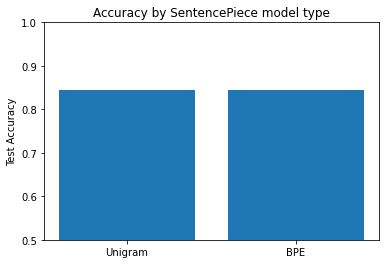

In [60]:

import matplotlib.pyplot as plt

labels = ['Unigram', 'BPE']
scores = [acc_uni, acc_bpe]

plt.bar(labels, scores)
plt.ylim(0.5, 1.0)
plt.title("Accuracy by SentencePiece model type")
plt.ylabel("Test Accuracy")
plt.show()




- Unigram과 BPE는 감성 분류 정확도에서 거의 동일한 성능을 보임.

- 정확도 외에도 모델 구조, 속도, 언어적 특성(예: 한국어의 형태소 구조) 등을 종합적으로 고려해야 함.

### SentencePiece Unigram과 BPE 모델을 비교하여 성능 외에,
### 모델 구조, 속도, 한국어 특성까지 종합적으로 고려한 분석

데이터: [Naver 영화 리뷰 감성 분석 데이터셋 (https://github.com/e9t/nsmc)] 사용

토크나이징: SentencePiece (Unigram, BPE 각각 학습)

모델 성능 비교: 정확도, 학습 시간, 평균 토큰 길이

언어 특성 고려: 한국어 어절/형태소 기반 구조 분석 포함

In [ ]:
import os
import urllib.request
import pandas as pd
import sentencepiece as spm
import time
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
# Step 1: Download dataset

print("[Step 1] Downloading NSMC dataset...")

def download_nsmc():
    url = "https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt"
    save_path = "nsmc_train.txt"
    if not os.path.exists(save_path):
        urllib.request.urlretrieve(url, save_path)
    return save_path

corpus_path = download_nsmc()

print("[Step 1] Completed.\n")

In [ ]:
# Step 2: Load dataset
print("[Step 2] Loading dataset...")

df = pd.read_csv(corpus_path, sep='\t').dropna()

sentences = df['document'].astype(str).tolist()
labels = df['label'].tolist()

print(f"[Step 2] Loaded {len(sentences)} sentences.\n")


In [ ]:
# Step 3: Save corpus to file
print("[Step 3] Saving corpus to corpus.txt...")

with open("corpus.txt", "w", encoding="utf-8") as f:
    for line in sentences:
        f.write(line.strip().replace('\n', '') + '\n')
        
print("[Step 3] Done.\n")


In [ ]:
# Step 4: Train SentencePiece models

def train_spm(model_type, prefix):
    print(f"[Step 4] Training SentencePiece model ({model_type})...")
    
    spm.SentencePieceTrainer.train(
        input='corpus.txt',
        model_prefix=prefix,
        vocab_size=8000,
        character_coverage=1.0,
        model_type=model_type
    )
    print(f"[Step 4] {model_type} model training completed.\n")

train_spm("unigram", "spm_uni")
train_spm("bpe", "spm_bpe")


In [ ]:
# Step 5: Load trained models
print("[Step 5] Loading trained models...")

sp_uni = spm.SentencePieceProcessor(model_file="spm_uni.model")
sp_bpe = spm.SentencePieceProcessor(model_file="spm_bpe.model")

print("[Step 5] Models loaded.\n")


In [ ]:
# Step 6: Define tokenization function
print("[Step 6] Defining tokenization function...")

def tokenize_and_join(sentences, tokenizer):
    return [" ".join(tokenizer.encode(s, out_type=str)) for s in sentences]

print("[Step 6] Function ready.\n")


In [ ]:
# Step 7: Split train/test data
print("[Step 7] Splitting train/test data...")

X_train_raw, X_test_raw, y_train, y_test = train_test_split(sentences, labels, test_size=0.2, random_state=42)

print(f"[Step 7] Training set: {len(X_train_raw)}, Test set: {len(X_test_raw)}\n")


In [ ]:
# Step 8: Define train and evaluate function
print("[Step 8] Defining training and evaluation function...")

def train_and_evaluate(tokenizer, X_train, X_test, y_train, y_test):
    X_train_tok = tokenize_and_join(X_train, tokenizer)
    X_test_tok = tokenize_and_join(X_test, tokenizer)

    vectorizer = TfidfVectorizer()
    X_train_vec = vectorizer.fit_transform(X_train_tok)
    X_test_vec = vectorizer.transform(X_test_tok)

    model = LogisticRegression(max_iter=1000)
    
    start = time.time()
    model.fit(X_train_vec, y_train)
    elapsed = time.time() - start
    
    preds = model.predict(X_test_vec)
    acc = accuracy_score(y_test, preds)
    avg_len = sum(len(t.split()) for t in X_test_tok) / len(X_test_tok)

    return acc, elapsed, avg_len

print("[Step 8] Function defined.\n")

    

In [ ]:
# Step 9: Run training and evaluation
print("[Step 9] Running training and evaluation...")

acc_uni, time_uni, len_uni = train_and_evaluate(sp_uni, X_train_raw, X_test_raw, y_train, y_test)
acc_bpe, time_bpe, len_bpe = train_and_evaluate(sp_bpe, X_train_raw, X_test_raw, y_train, y_test)

print("[Step 9] Evaluation completed.\n")


In [ ]:
# Step 10: Display results
print("[Step 10] Printing summary results...")

df_result = pd.DataFrame({
    'Model': ['Unigram', 'BPE'],
    'Accuracy': [acc_uni, acc_bpe],
    'Training Time (sec)': [time_uni, time_bpe],
    'Avg Token Length': [len_uni, len_bpe]
})

print(df_result)
print("[Step 10] Done.\n")

In [ ]:
# Step 11: Visualize results
print("[Step 11] Visualizing comparison results...")

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

df_result.plot(x="Model", y="Accuracy", kind="bar", ax=axes[0], title="Accuracy", legend=False)
df_result.plot(x="Model", y="Training Time (sec)", kind="bar", ax=axes[1], title="Training Time", legend=False)
df_result.plot(x="Model", y="Avg Token Length", kind="bar", ax=axes[2], title="Avg Token Length", legend=False)

for ax in axes:
    ax.set_ylim(bottom=0)
    ax.grid(axis='y')

plt.tight_layout()
plt.show()
print("[Step 11] Visualization complete.")